In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder

# Initialize data storage
data = []
labels = []

# Define paths for tumor and non-tumor images
dataset_path = "/content/drive/MyDrive/brain-tumor-dataset/brain_tumor_dataset"
categories = ["yes", "no"]  # "yes" -> Tumor, "no" -> No Tumor

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_labels = encoder.fit_transform(np.array([[0], [1]]))  # 0 for "no", 1 for "yes"

# Load images from both categories
for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)

    for file in os.listdir(folder_path):
        if file.endswith('.jpg'):
            img_path = os.path.join(folder_path, file)

            # Load and preprocess the image
            img = Image.open(img_path)
            img = img.resize((128, 128))
            img = np.array(img)

            # Ensure image is in RGB format
            if img.shape == (128, 128, 3):
                data.append(img)
                labels.append(encoded_labels[idx])  # Assign encoded label

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {len(data)} images.")
print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")


Loaded 139 images.
Data shape: (139, 128, 128, 3), Labels shape: (139, 2)


In [3]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [4]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 139


In [5]:
result=labels
result = np.array(result)
result = result.reshape(139,2)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [7]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 111


In [8]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 28


# Model training

In [74]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.27))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.27))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [75]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 55.7824 - val_loss: 28.7135
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 16.7255 - val_loss: 65.0842
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 13.1418 - val_loss: 23.0440
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3.8008 - val_loss: 7.6119
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.2460 - val_loss: 5.0448
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.3991 - val_loss: 3.4331
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7527 - val_loss: 2.3514
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5043 - val_loss: 1.8757
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.5876 - val_loss: 1.5663
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4714 - val_loss: 1.3737
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2213 - val_loss: 1.2599
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1824 - val_loss: 1.1

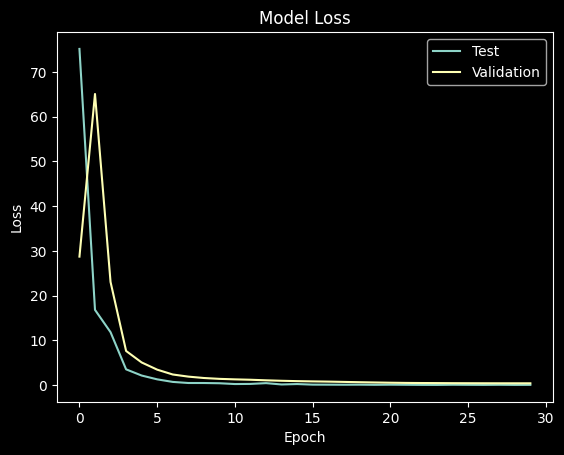

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [48]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


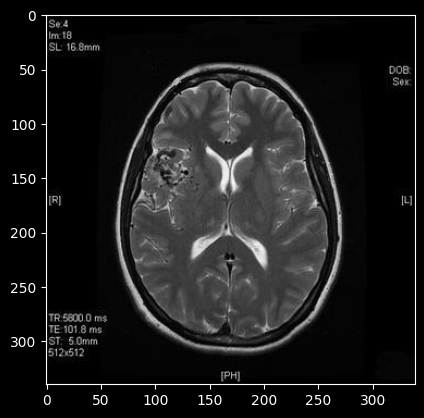

In [77]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain-tumor-dataset/brain_tumor_dataset/no/No14.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

82.22082257270813% Confidence This Is Its a Tumor


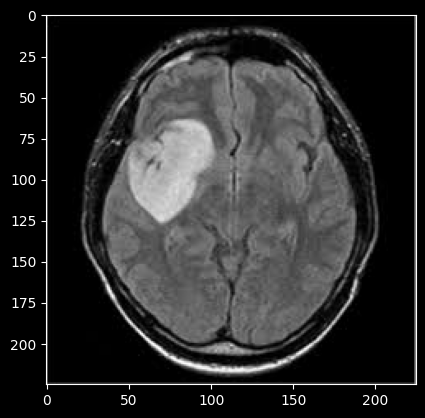

In [78]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain-tumor-dataset/brain_tumor_dataset/yes/Y4.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [84]:
# Save the entire model
model.save("/content/drive/MyDrive/brain-tumor-dataset/brain_tumor_model.h5")
model.save_weights("/content/drive/MyDrive/brain-tumor-dataset/brain_tumor.weights.h5")
